In [2]:
pip list

Package                       Version
----------------------------- --------------------
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aioquic                       1.0.0
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altair                        5.2.0
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-navigator            2.4.2
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
arabic-reshaper               3.0.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asgiref                       3.8.1
asn1crypto                    1.5.1
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\clip-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\open_clip_torch-2.24.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\stable_diffusion-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
date = pd.read_excel("date.xlsx")
date

,Unnamed: 0,time_point,aqi,pm2_5,pm10,so2,no2,co,o3,rank,quality
0,0,2013-12-02,251,201,313,155,77,3.2,17,90.0,重度污染
1,1,2013-12-03,127,97,153,69,50,2.1,31,39.0,轻度污染
2,2,2013-12-04,90,57,130,90,52,2.2,25,13.0,良
3,3,2013-12-05,77,41,104,70,48,1.9,34,23.0,良
4,4,2013-12-06,123,88,195,97,67,2.3,26,46.0,轻度污染
...,...,...,...,...,...,...,...,...,...,...,...
3784,3784,2024-04-19,149,70,247,4,19,0.4,98,260.0,轻度污染
3785,3785,2024-04-20,122,66,194,6,34,0.5,85,324.0,轻度污染
3786,3786,2024-04-21,117,55,183,6,39,0.5,125,312.0,轻度污染
3787,3787,2024-04-22,91,43,132,6,36,0.5,130,317.0,良


In [5]:
%matplotlib inline

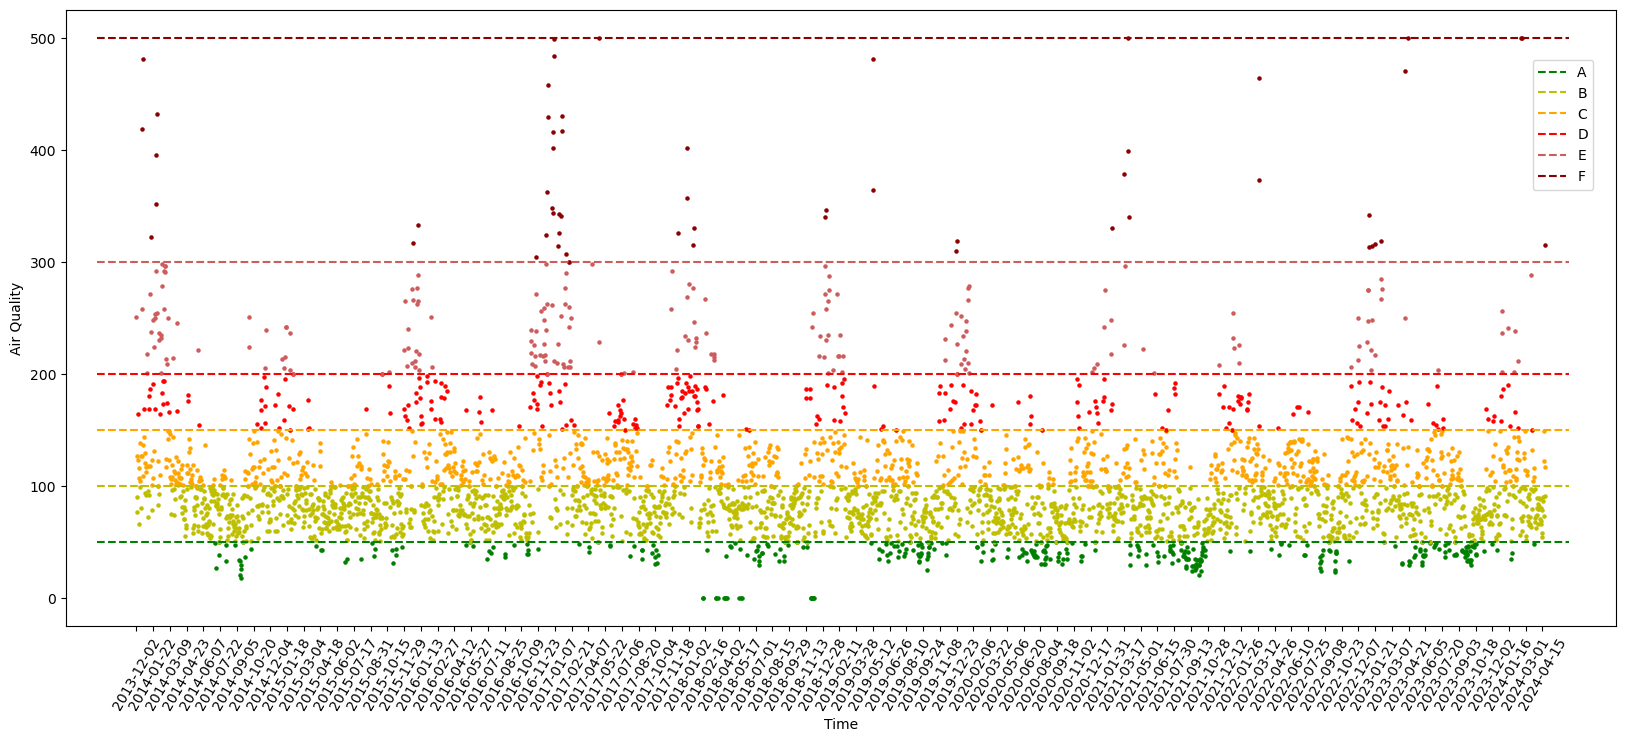

In [6]:
x = date['time_point']
y = date['aqi']
z = date['rank']
o = date['pm2_5']
p = date['pm10']
q = date['so2']
r = date['no2']
s = date['co']
t = date['o3']
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20, 8))
a = 50
b = 100
c = 150
d = 200
e = 300
f = 500
aa = np.ma.masked_where(y > a, y)
bb = np.ma.masked_where((y < a) | (y > b), y)
cc = np.ma.masked_where((y < b) | (y > c), y)
dd = np.ma.masked_where((y < c) | (y > d), y)
ee = np.ma.masked_where((y < d) | (y > e), y)
ff = np.ma.masked_where(y < e, y)
# aa = np.ma.masked_where(y < a, y)
# aa = np.ma.masked_where(y < a, y)
# aa = np.ma.masked_where(y < a, y)

plt.axhline(y=50, xmin=0.02, xmax=0.97, color='g', linestyle="--", label='A')
plt.axhline(y=100, xmin=0.02, xmax=0.97, color='y', linestyle="--", label='B')
plt.axhline(y=150, xmin=0.02, xmax=0.97, color='orange', linestyle="--", label='C')
plt.axhline(y=200, xmin=0.02, xmax=0.97, color='r', linestyle="--", label='D')
plt.axhline(y=300, xmin=0.02, xmax=0.97, color='indianred', linestyle="--", label='E')
plt.axhline(y=500, xmin=0.02, xmax=0.97, color='darkred', linestyle="--", label='F')
plt.xticks(range(0, len(x), 45), rotation = 60)
plt.xlabel('Time')
plt.ylabel('Air Quality')
plt.scatter(x, aa, color='g', s=5)
plt.scatter(x, bb, color='y', s=5)
plt.scatter(x, cc, color='orange', s=5)
plt.scatter(x, dd, color='r', s=5)
plt.scatter(x, ee, color='indianred', s=5)
plt.scatter(x, ff, color='darkred', s=5)
# plt.plot(x, z)
plt.legend(bbox_to_anchor=(0.99,0.93), frameon=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff86c06d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff86cc2690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff86c05650>,
 'medians': [<matplotlib.lines.Line2D at 0x1ff84af5650>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ff8747e010>,
 'means': []}

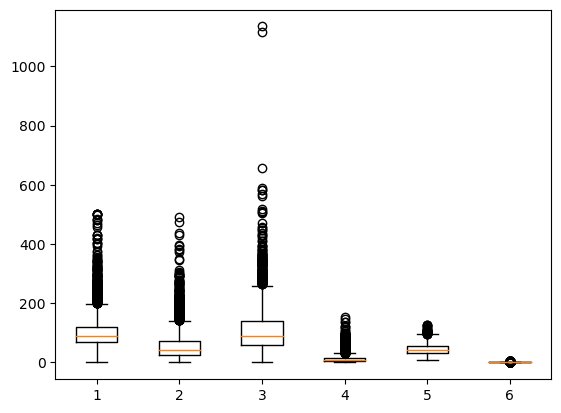

In [9]:
inp = [y, o, p, q, r, s]
plt.boxplot(inp)

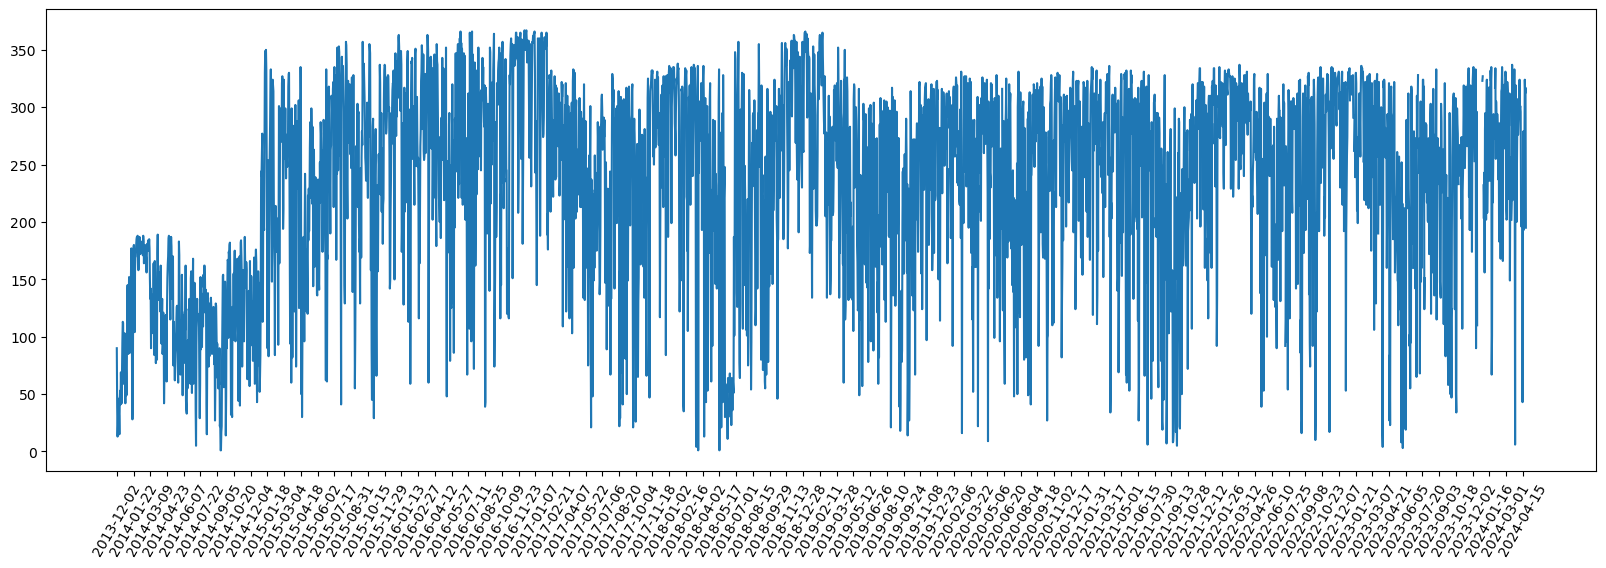

In [11]:
plt.figure(figsize=(20, 6))
plt.xticks(range(0, len(x), 45), rotation = 60)
plt.plot(x, z)